In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from urllib.parse import urlencode

Пришло время первого небольшого проекта по статистике! На этот раз исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

1. Загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, размер, наличие пропущенных значений (если есть – удалить). Также изучите типы переменных.

In [2]:
# Ссылка с данными games.csv
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/DqsoMAMSlyd2hQ'

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

In [3]:
# Загружаем данные games.csv
game_sells = pd.read_csv(download_url)

In [4]:
game_sells

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
# Смотрим тип данных столбцов
game_sells.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
# Проверяем наличие пустых значений
game_sells.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
# Удаляем пропущенные значения
game_sells = game_sells.dropna()

2. Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.


In [8]:
# Описательные характеристики года
game_sells['Year'].describe()

count    16291.000000
mean      2006.405561
std          5.832412
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [9]:
# Считаем количество выпущенных игр в год
sg_for_years = game_sells \
              .groupby('Year', as_index=False) \
              .agg({'Rank': 'count'}) \
              .rename(columns={'Rank': 'Sells'})

In [10]:
sg_for_years.head()

,Year,Sells
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


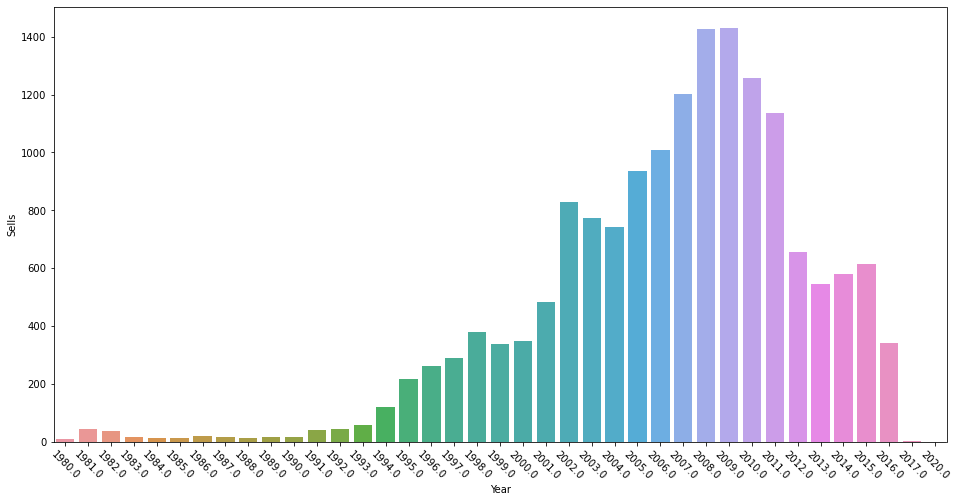

In [11]:
# Строим график по оси Х - год выпуска, на оси Y количество выпущенных игр
plt.figure(figsize=(16, 8))
sns.barplot(data=sg_for_years, x='Year', y='Sells')
plt.xticks(rotation=-45)
plt.show()

3. На каких платформах произошло больше всего релизов?

Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [12]:
# Считаем соотношение релизов каждой платформы к общему количеству выпущенных игр
release = game_sells.Platform.value_counts().div(game_sells.shape[0]).mul(100)

In [13]:
release.head()

DS      13.080842
PS2     13.056289
PS3      8.004420
Wii      7.918483
X360     7.574735
Name: Platform, dtype: float64

In [14]:
# Выводим название платформ, релиз чьих игр составляет более 7% от общего релиза игр
print(*list(release[release > 7].index), sep=', ')

DS, PS2, PS3, Wii, X360, PSP, PS


4. Игры каких издателей (Publisher) встречаются в датасете чаще всего?  
В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [15]:
# Считаем количество выпущенных игр всех издателей
game_sells.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [16]:
# Выводим максимальное количество выпущенных игр от одного издателя
game_sells.Publisher.value_counts().max()

1339

5. Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other).  
В каком регионе медианное значение объема продаж является наибольшим?


In [17]:
# Выводим среднее, медиану и стандартное отклонение по продажам от Nintendo
game_sells \
        .query('Publisher == "Nintendo"') \
        [['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']] \
        .describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,696.000000,696.000000,696.000000,696.000000,696.000000
mean,1.172055,0.601006,0.653721,0.136767,2.563836
std,2.989913,1.743953,1.063110,0.464170,5.676925
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.010000,0.007500,0.090000,0.000000,0.300000
50%,0.375000,0.120000,0.280000,0.030000,0.920000
75%,0.972500,0.482500,0.740000,0.090000,2.262500
max,41.490000,29.020000,10.220000,8.460000,82.740000


6. Tеперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где:  
по оси x будет расположен жанр игры (Genre)  
по оси у – объем продаж в Японии (JP_sales)

In [18]:
# Создаем таблицу с данными о продажах игр в Японии
jp_sales_for_genre = game_sells \
                    .query('Publisher == "Nintendo" and JP_Sales != 0') \
                    .rename(columns={'JP_Sales': 'Income'})[['Genre', 'Income']]

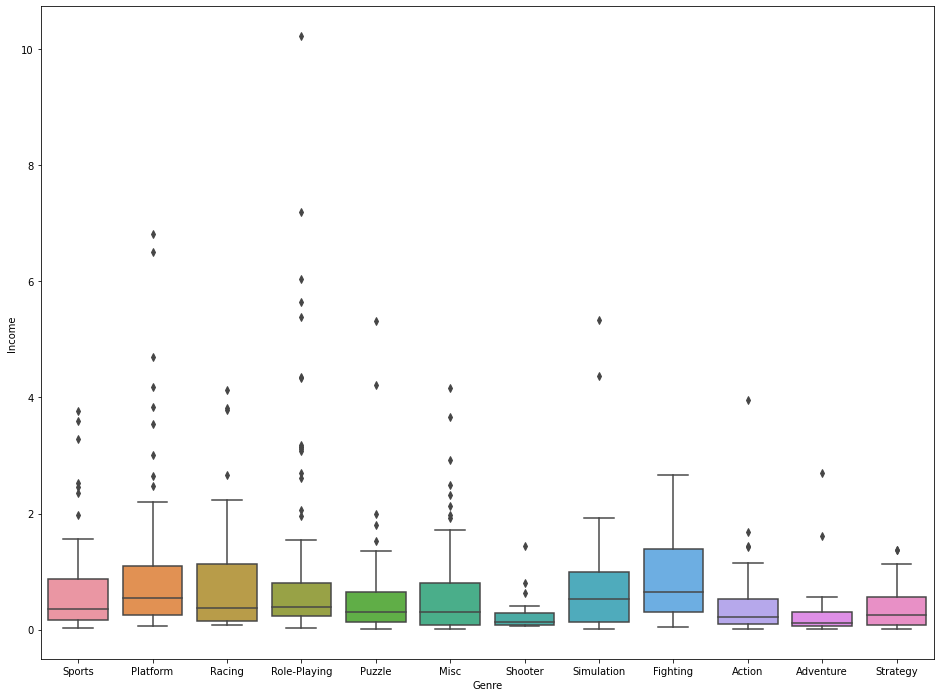

In [19]:
# Выводим бокспоты о продажах игр в Японии по жанрам
plt.figure(figsize=(16,12))
sns.boxplot(data=jp_sales_for_genre, x='Genre', y='Income')
plt.show()

7. Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.  
На каком отрезке времени было продано наибольшее количество копий игр жанра Sports? Иными словами, выберите отрезок, который включает в себя несколько крупных пиков.

In [20]:
# Отбираем игры по вышеперечисленным критериям
task_7 = game_sells \
            .query('Publisher == "Nintendo" and Genre in ["Fighting", "Simulation", "Platform", "Racing", "Sports"]')

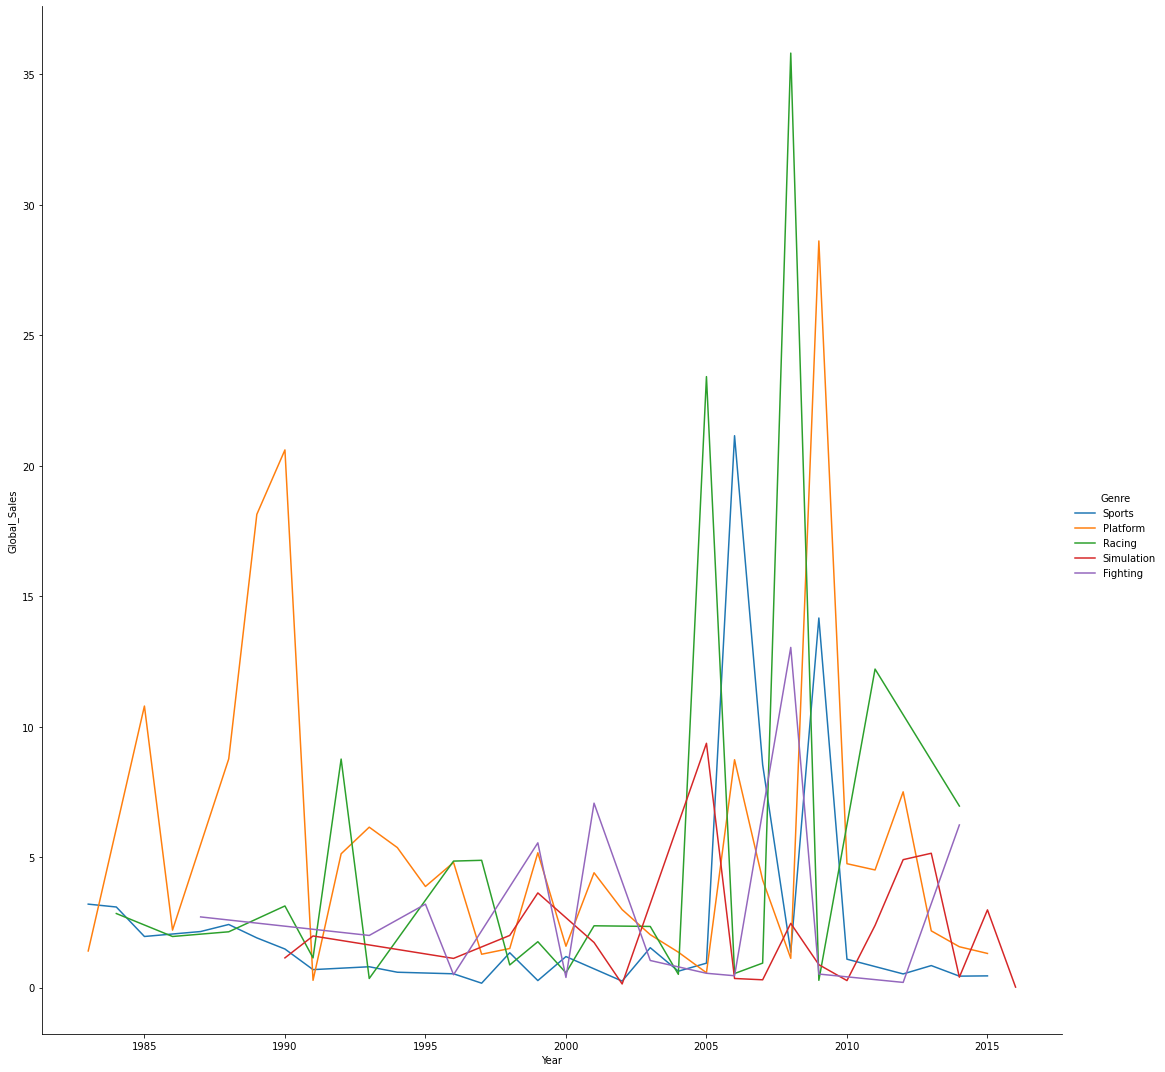

In [21]:
# Строим график продаж игр по годам в разделении по жанрам
sns.relplot(data=task_7,
            kind='line',
            x='Year',
            y='Global_Sales',
            hue='Genre',
            ci=None,
            height=15)
plt.show()

Годы с наибольшими продажами игр в жанре спорт является 2005-2010